# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 11

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  20 баллов
* Задача 2 &mdash;  40 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  60 баллов
* Задача 4 &mdash;  30 баллов





-----

In [ ]:
# Bot check

# HW_ID: phds_hw11
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import graphviz

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree

# возможно придется что-то добавить)

## <b><font color="blue">Легкая часть</font></b>

## Задача 1

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте и поясните свой ответ на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака; 
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно с признаком $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

## ответ:
1. Монотонные функции от одного признака:

можно: сохраняют порядок значений признака, не влияя на структуру дерева, монотонные преобразования не изменяют порядок  сравнений, поэтому структура дерева остаётся той же. 

2. Немонотонные функции от одного признака:

можно но осторожно: могут изменить порядок значений признака, создать дополнительные точки разбиения в дереве, увеличивая его сложность, что может улучшить точность модели, но с риском переобучения.

3. Линейные функции от нескольких признаков:

не стоит: разделение в решающем дереве происходит по одному признаку за раз, а любая линейная комбинация может быть выражена как последовательность разбиений по отдельным признакам.

4. Нелинейные функции от нескольких признаков:

стоит но осторожно: помогут выявить сложные взаимосвязи, могут создать новые, информативные признаки, но также могут усложнить модель (с риском переобучения).

5. Стандартизация признаков:

не стоит: Решающие деревья нечувствительны к масштабу признаков, стандартизация не влияет на структуру дерева, разделение основано на порядке значений, а не на их абсолютных величинах.

6. Преобразования категориальных признаков:

стоит: деревья работают с числовыми значениями, сравнивая их с пороговыми, преобразование категориальных признаков в числовые (например, one-hot encoding) может быть необходимо если из использовать в решающем дереве.

## Задача 2

### 1. Загрузка и предобработка данных.
### *Профиль физика*



Скачайте [данные](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification) по классификации кристаллических решеток. Целевой переменной в этой задаче является `Lowest distortion`.



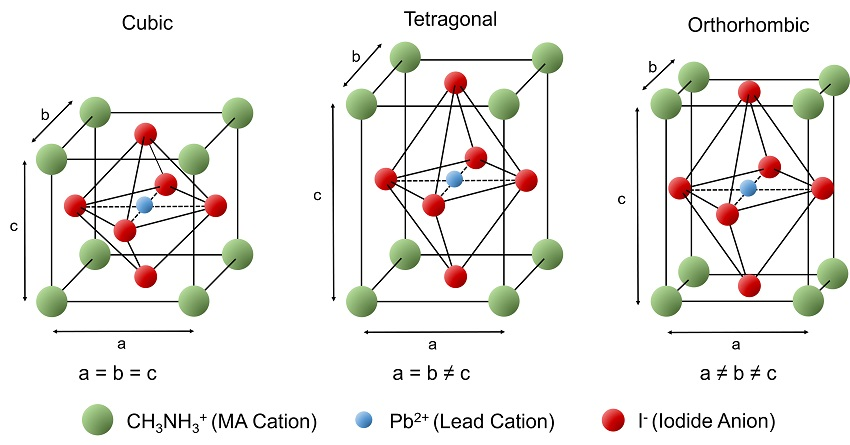


Каждое наблюдение описывается 13 столбцами признаков и 1 столбцом класса, который идентифицирует его как кубическую, тетрагональную, ромбическую или ромбоэдрическую структуру. Наборы признаков - различные параметры кристаллической решетки, такие как валентность, ионный радиус, среднее значение электроотрицательности, постоянная решетки, а так же энергия, которая численно равна работе, которую необходимо затратить, чтобы разделить и отделить друг от друга на бесконечное расстояние частицы.

In [ ]:
data = pd.read_csv("/content/Crystal_structure.csv")

Сделаем предобработку данных.

In [ ]:
# уберем признаки, которые нам не нужны (подробнее можете почиать во вкладке 'Code' на странице датасета)
data = data.drop(["In literature", "Compound", "τ"], axis=1)
# убираем объекты, для которых неизвестен таргет
data = data.drop(data[data["Lowest distortion"] == "-"].index).reset_index(drop=True)
# закодируем целевую переменную числами
data['Lowest distortion'] = LabelEncoder().fit_transform(data['Lowest distortion'])
# закодируем категориальные признаки числами
data['A'] = LabelEncoder().fit_transform(data['A'])
data['B'] = LabelEncoder().fit_transform(data['B'])
# обработаем пропуски
for i in data.columns:
    column = data[i]
    for k in range(len(column)):
        if column[k] == '-':
            column[k] = 0
    data[i] = column

### *Профиль биология*

В этом [наборе данных](https://www.kaggle.com/datasets/arezaei81/heartcsv) содержится различная информация о пациентах, включая возраст, пол, артериальное давление, уровень холестерина, электрокардиографические характеристики (ЭКГ) и многое другое. Целевой характеристикой является `target` - наличие у пациента сердечного заболевания.



Информация о наборе данных:

1. **age**: Возраст пациента.
2. **sex**: Пол пациента (0: женский, 1: мужской).
3. **cp**: Тип боли в груди.
4. **trestbps**: Артериальное давление в состоянии покоя.
5. **chol**: уровень холестерина в сыворотке крови.
6. **fbs**: Быстрый сахар крови > 120 мг/дл.
7. **restecg**: Результаты электрокардиографии в состоянии покоя.
8. **thalach**: Максимальная достигнутая частота сердечных сокращений.
9. **exang**: Стенокардия, вызванная физической нагрузкой.
10. **oldpeak**: Депрессия ST, вызванная физической нагрузкой по сравнению с покоем.



In [6]:
heart = pd.read_csv('D:\heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Обучение модели


Создайте массив признаков и массив таргета.

In [8]:
needed_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak']
X = heart[needed_columns]
y = heart['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777)

Обучите модель решающего дерева.

In [11]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Сделайте предсказание для тестовой выборки.

In [12]:
predictions = clf.predict(X_test)

Создайте массив, показывающий успех или не успех модели (1 если модель угадала класс, 0 если не угадала).

In [31]:
success = (predictions==y_test).astype(int)
success

136    0
89     0
244    1
273    0
158    0
      ..
141    1
177    1
155    1
288    1
93     1
Name: target, Length: 91, dtype: int32

Вы получили выборку из распределения $Bern(\theta)$. Постройте доверительный интервал для $\theta$.

In [32]:
p = sum(success)/len(success) # а.н.о
q = (len(success) - sum(success))/len(success)
sigma = np.sqrt(p*q/len(success)) # состоятельная оценка дисперсии
left = p - 1.96/np.sqrt(len(success)) * sigma
right = p + 1.96/np.sqrt(len(success)) * sigma
left, right

(0.7045556291775039, 0.7240157993939247)

Повторите все шаги для случайного леса. Сравните полученные интервалы.

In [34]:
n_estimators = 25
model = RandomForestClassifier(n_estimators=n_estimators)
model.fit(X_train, y_train)

predictions_forest = model.predict(X_test)

success_forest = (predictions_forest==y_test).astype(int)
success_forest

p = sum(success_forest)/len(success_forest) # а.н.о
q = (len(success_forest) - sum(success_forest))/len(success_forest)
sigma = np.sqrt(p*q/len(success_forest)) # состоятельная оценка дисперсии
left = p - 1.96/np.sqrt(len(success_forest)) * sigma
right = p + 1.96/np.sqrt(len(success_forest)) * sigma
left, right

(0.7824545938081252, 0.7999629886094571)

**Выводы:** интервал уже для случайного леса, что указывает на более точную оценку, также интервал в случае леса интервал смещен ближе к единицы, что указывает на то что возрастает величина оцениваемого параметра, а именно вероятность верно предсказать класс, таким образом несколько деревьев здесь лучше чем одно.

## <b><font color="orange">Сложная часть</font></b>
## Задача 3
### 1. Загрузка данных
### *Профиль физика*

Рассмотрим <a href='https://archive.ics.uci.edu/dataset/291/airfoil+self+noise' target="_blank">набор данных НАСА</a>, он включает в себя аэродинамические профили NACA-0012 разных размеров при различных параметрах в аэродинамической трубе и углах атаки. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. Целевой переменной будет scaled-sound-pressure: это звуковое давление в определенной части лопасти, распределение этой величины показано на втором рисунке. Данная задача конечно имеет почти аналитическое решение, однако оно занимает довольно много времени и ресурсов. Мы хотим продемострировать возможность использования лесов для быстрых и довольно точных численных оценок.



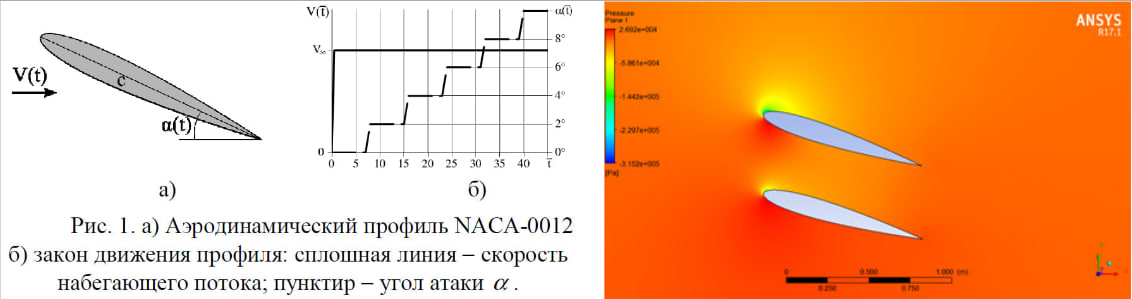

In [ ]:
column_names = ['frequency', 'attack-angle', 'chord-length', 'free-stream-velocity', "suction-side-displacement-thickness", "scaled-sound-pressure"]
df = pd.read_csv("/content/airfoil_self_noise.dat", sep='\t', names=column_names)

In [ ]:
df = df.rename(columns={'scaled-sound-pressure': 'target'})
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
X = df.drop('target',axis=1)
y = df[['target']]

In [ ]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

### *Профиль биология*

[Данные](https://archive.ics.uci.edu/dataset/1/abalone). Будем предсказывать возраст моллюсков.

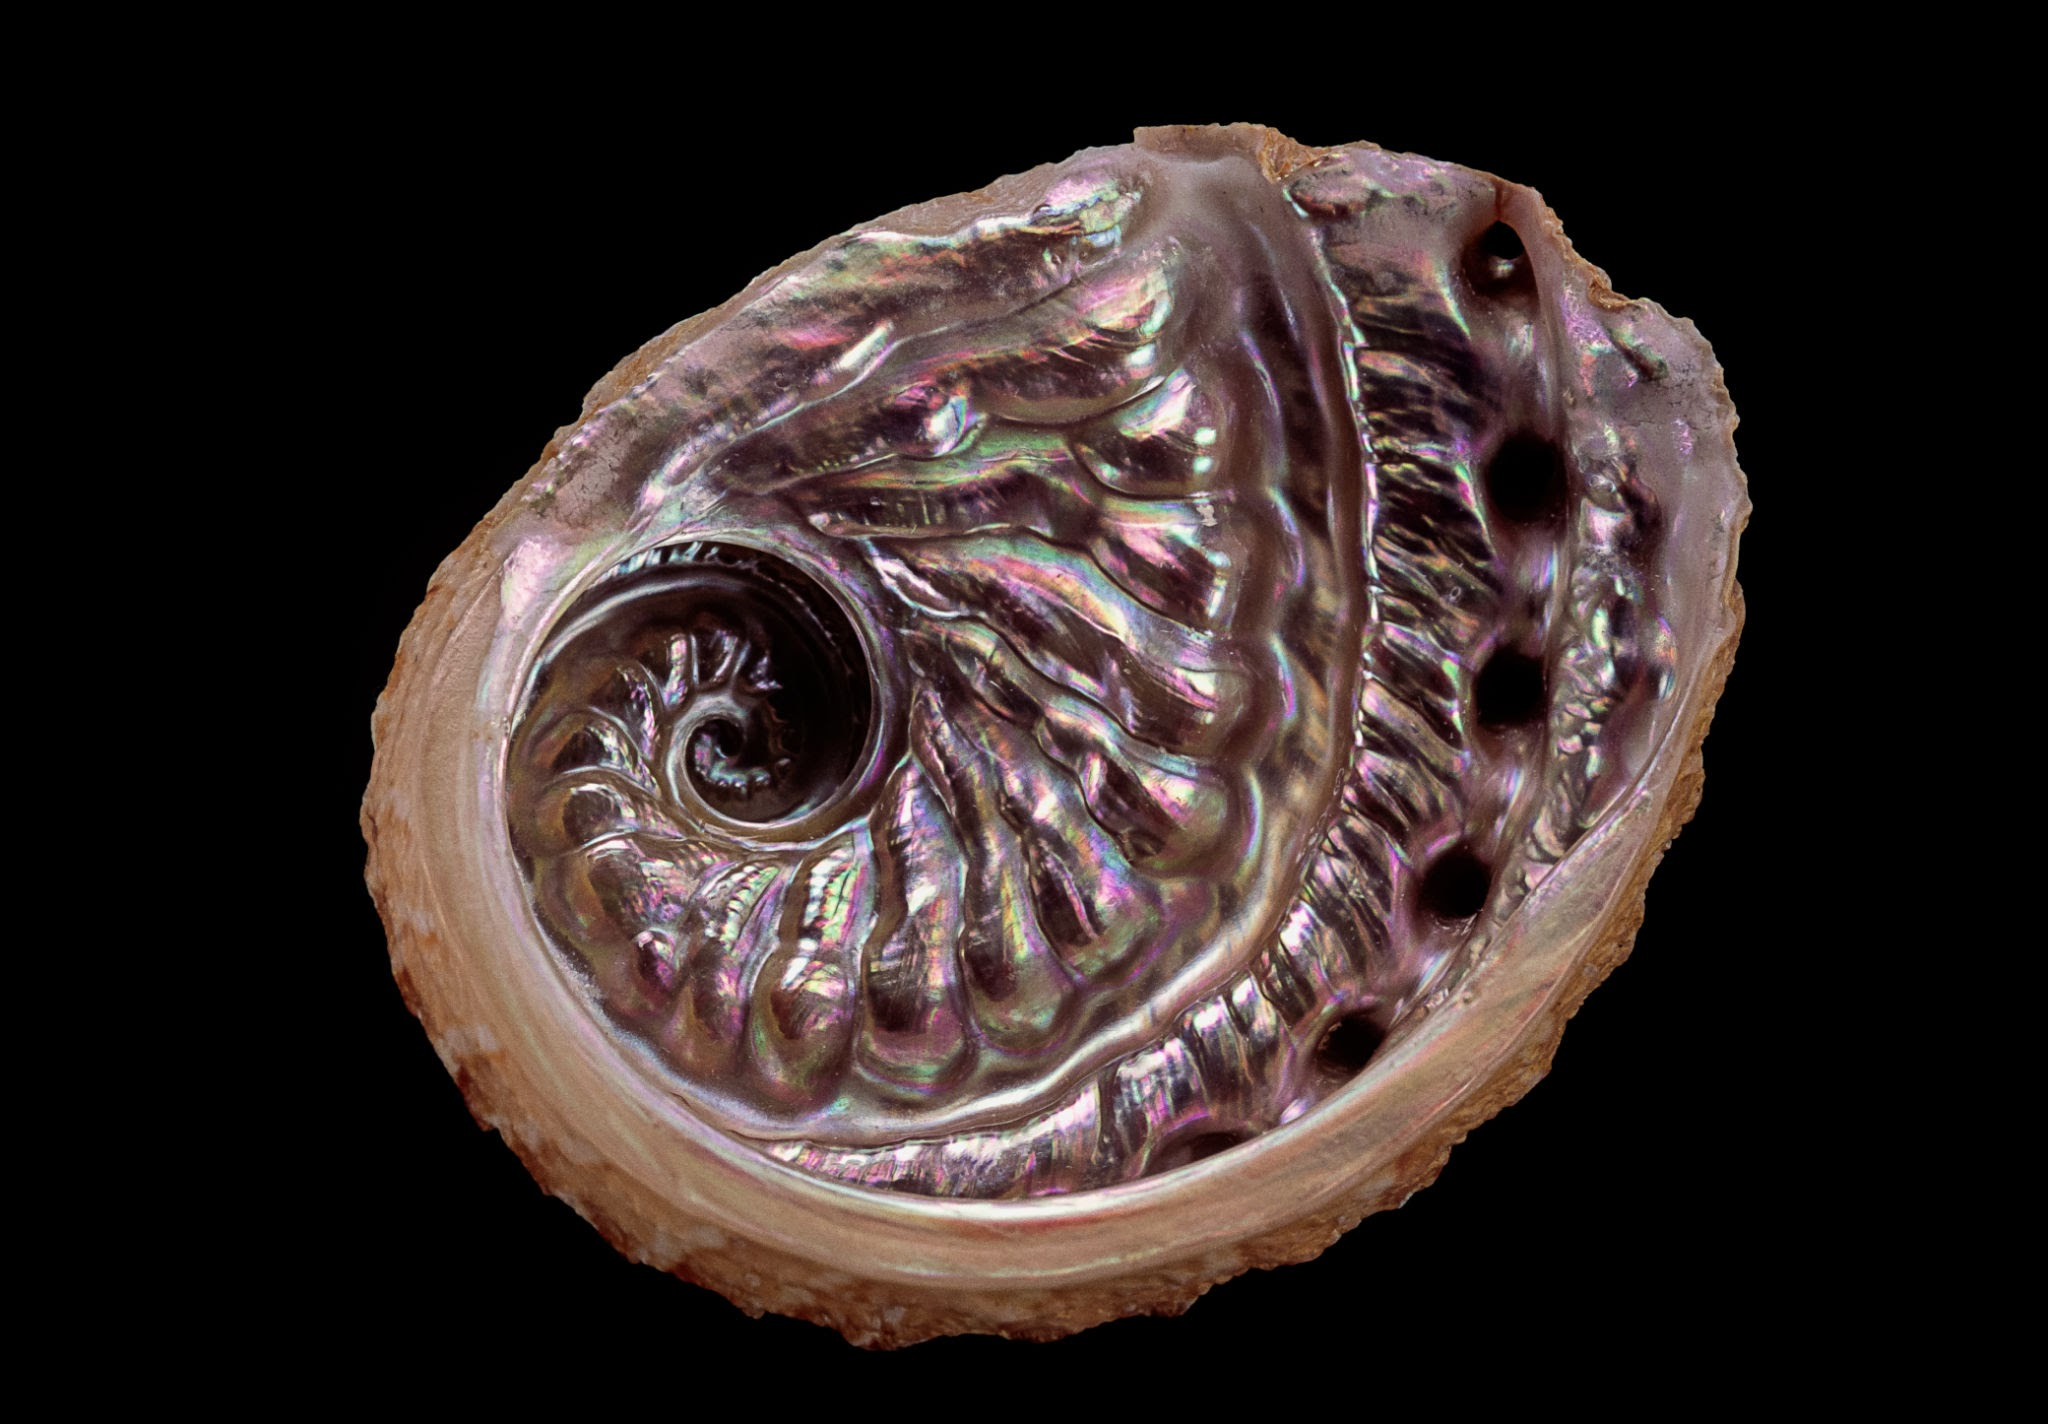

In [29]:
data = pd.read_csv('D:/abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                                          'Shucked weight', 'Viscera weight', 'Shell weight',
                                          'Rings'])

In [30]:
data = data.drop('Sex', axis=1)
X = data.drop('Rings', axis=1)
y = data['Rings'] + 1.5

In [35]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size = 0.2, random_state=42)

### 2. Обучение модели

Обучите решающее дерево глубины 3 и визуализируйте его.

*Рекомендуется сделать скриншот визуализации и прислать его в бот вместе с ноутбуком.*

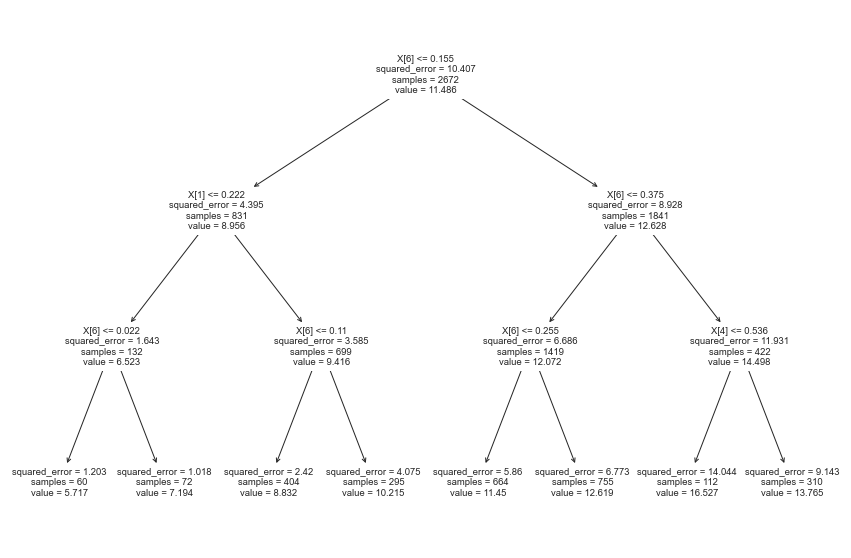

In [44]:
model2 = DecisionTreeRegressor(max_depth=3, random_state=42)
model2.fit(X_train, y_train)


plt.figure(figsize=(15, 10))
tree.plot_tree(model2)
plt.show()

Посчитайте выбранную метрику на валидационной выборке.

In [47]:
predicted = model2.predict(X_valid)
print('accuracy:', mean_absolute_error(y_valid, predicted))

accuracy: 1.7826823644868155


Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график - зависиость ошибки от максимальной глубины дерева. Подробнее про гиперпараметры смотрите в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

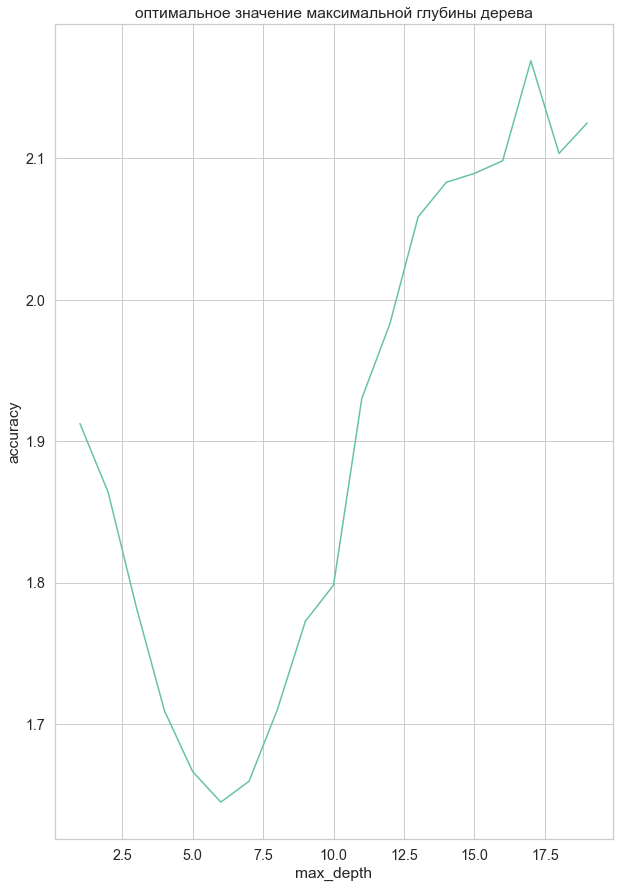

In [84]:
plt.figure(figsize=(10, 15))

accuracy_valid = []
max_depth_list = []

for max_depth in range(1, 20):
    max_depth_list.append(max_depth)
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train) 
    predictions_valid = model.predict(X_valid) 
    accuracy_valid.append(mean_absolute_error(predictions_valid, y_valid))

plt.plot(max_depth_list, accuracy_valid)
plt.title('оптимальное значение максимальной глубины дерева')
plt.xlabel('max_depth'), plt.ylabel('accuracy')
plt.show()

Аналогичным образом подберите минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться, зафиксировав при этом подобранное значение максимальной глубины. Для минимального числа объектов в листе и максимального число признаков, по которым ищется лучшее разбиение в дереве, подберите аналогично, фиксируя лучшие значения гиперпараметров, подобранные на предыдущем шаге.

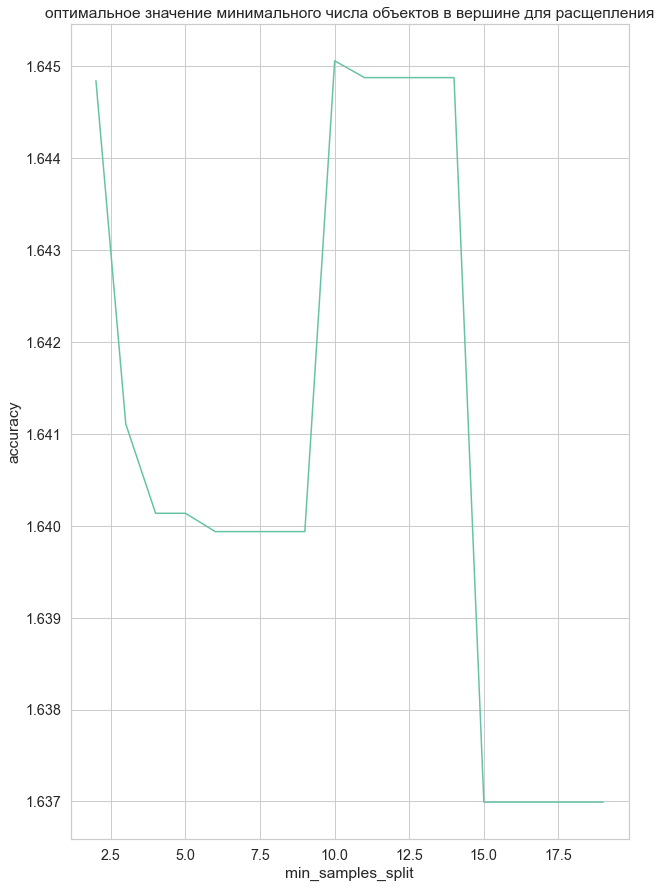

In [87]:
max_depth = 6 # минимум на графике выше

plt.figure(figsize=(10, 15))

accuracy_valid = []
min_samples_split_list = []

for min_samples_split in range(2, 20):
    min_samples_split_list.append(min_samples_split)
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    model.fit(X_train, y_train) 
    predictions_valid = model.predict(X_valid) 
    accuracy_valid.append(mean_absolute_error(predictions_valid, y_valid))

plt.plot(min_samples_split_list, accuracy_valid)
plt.title('оптимальное значение минимального числа объектов в вершине для расщепления')
plt.xlabel('min_samples_split'), plt.ylabel('accuracy')
plt.show()

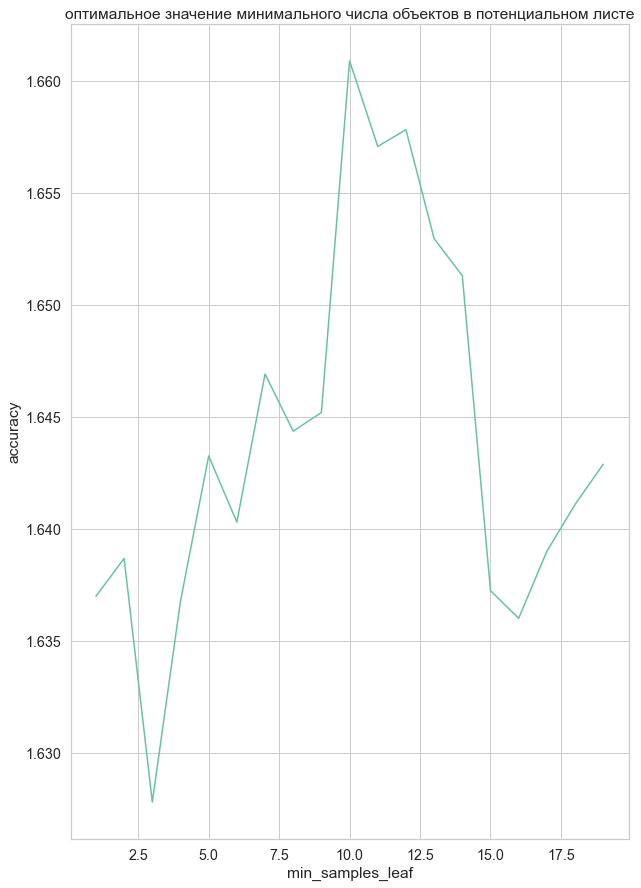

In [91]:
max_depth = 6 # минимум на первом графике
min_samples_split = 15 # первое значение на плато минимума на предыдущем графике 

plt.figure(figsize=(10, 15))

accuracy_valid = []
min_samples_leaf_list = []

for min_samples_leaf in range(1, 20):
    min_samples_leaf_list.append(min_samples_leaf)
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf, random_state=42)
    model.fit(X_train, y_train) 
    predictions_valid = model.predict(X_valid) 
    accuracy_valid.append(mean_absolute_error(predictions_valid, y_valid))

plt.plot(min_samples_leaf_list, accuracy_valid)
plt.title('оптимальное значение минимального числа объектов в потенциальном листе')
plt.xlabel('min_samples_leaf'), plt.ylabel('accuracy')
plt.show()

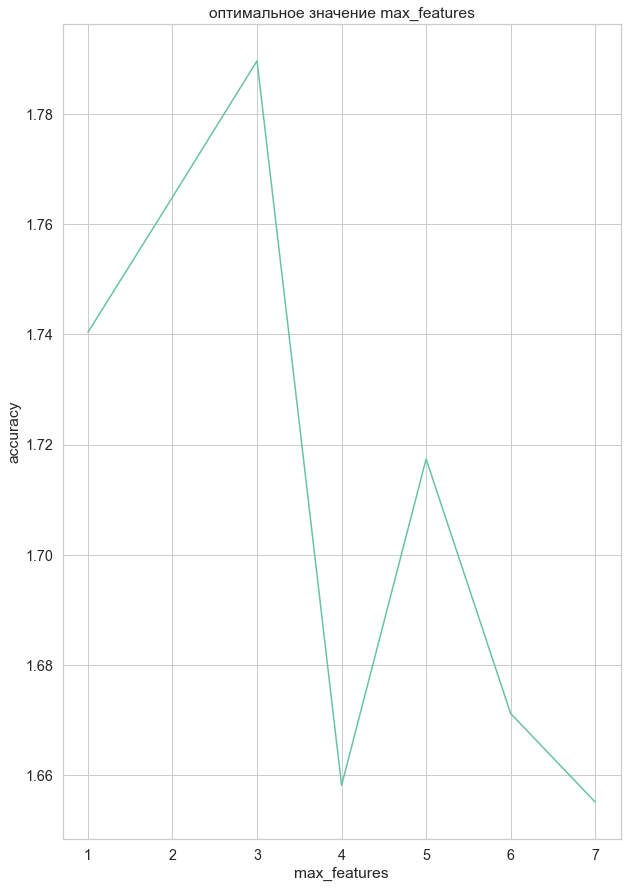

In [108]:
max_depth = 5 # минимум на первом графике
min_samples_split = 11 # первое значение на плато минимума на втором графике 
min_samples_leaf = 3 # минимум на предыдущем графике

plt.figure(figsize=(10, 15))

accuracy_valid = []
max_features_list = []
n_features = model2.n_features_in_ # для определения правой границы max_features

for max_features in range(1, n_features+1):
    max_features_list.append(max_features)
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf, max_features=max_features, random_state=42)
    model.fit(X_train, y_train) 
    predictions_valid = model.predict(X_valid) 
    accuracy_valid.append(mean_absolute_error(predictions_valid, y_valid))

plt.plot(max_features_list, accuracy_valid)
plt.title('оптимальное значение max_features')
plt.xlabel('max_features'), plt.ylabel('accuracy')
plt.show()

Обучите вашу лучшую модель и сделайте предсказание для тестовой выборки.

In [111]:
max_depth = 5
min_samples_split = 11
min_samples_leaf = 16
max_features = 7 # на предыдущем графике находим двух кандидатов на минимум (4 и 7), лучший скор показывает 7 

my_best_model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf, max_features=max_features, random_state=42)
my_best_model.fit(X_train, y_train) 
predictions_test = my_best_model.predict(X_test) 
print('accuracy best:', mean_absolute_error(y_test, predictions_test))

accuracy best: 1.6739151782302657


Теперь вам предлагается проверить результат своей реализации с уже существующей функцией для оптимизации гиперпараметров - `GridSearchCV`. Эта функция помогает перебирать предопределенные гиперпараметры и подгонять вашу модель к тренировочному набору. Сравните полученные гиперпараметры и если они различаются, объясните почему. Для этого вам может понадобится [документация](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [117]:
param_grid = {
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'min_samples_split': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'min_samples_leaf': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'max_features': [1, 2, 3, 4, 5, 6, 7]
}


grid_tree_model = DecisionTreeRegressor()
grid_search = GridSearchCV(grid_tree_model,param_grid,n_jobs=-1)  
grid_search.fit(X_train, y_train)


print(grid_search.best_params_)
print(grid_search.best_score_)


D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
29400 fits failed out of a total of 308700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14700 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "D:\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    if not 0.0 < self.min_samples_leaf <= 0.5:
TypeError: '<' not supported between instances of 'float' and 'NoneType'

-----------------------

{'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 19, 'min_samples_split': 8}
0.5075249790792608


D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.49730567 0.49688782 0.49699508]
  warnings.warn(


Значения не далекие, но различаются потому что мы на каждом шаге фиксировали все предыдущие параметры, принимая их за лучшие, не позволяя перебора, для оптимального дерева важна комбинация всех признаков, причем в оптимальных значениях

Посчитатайте метрику на тестовой выборке и взуализируйте деревья при оптимальных гиперпараметрахдля двух оптимальных моделей - вашей и GridSearchCV.

**Ваша модель**

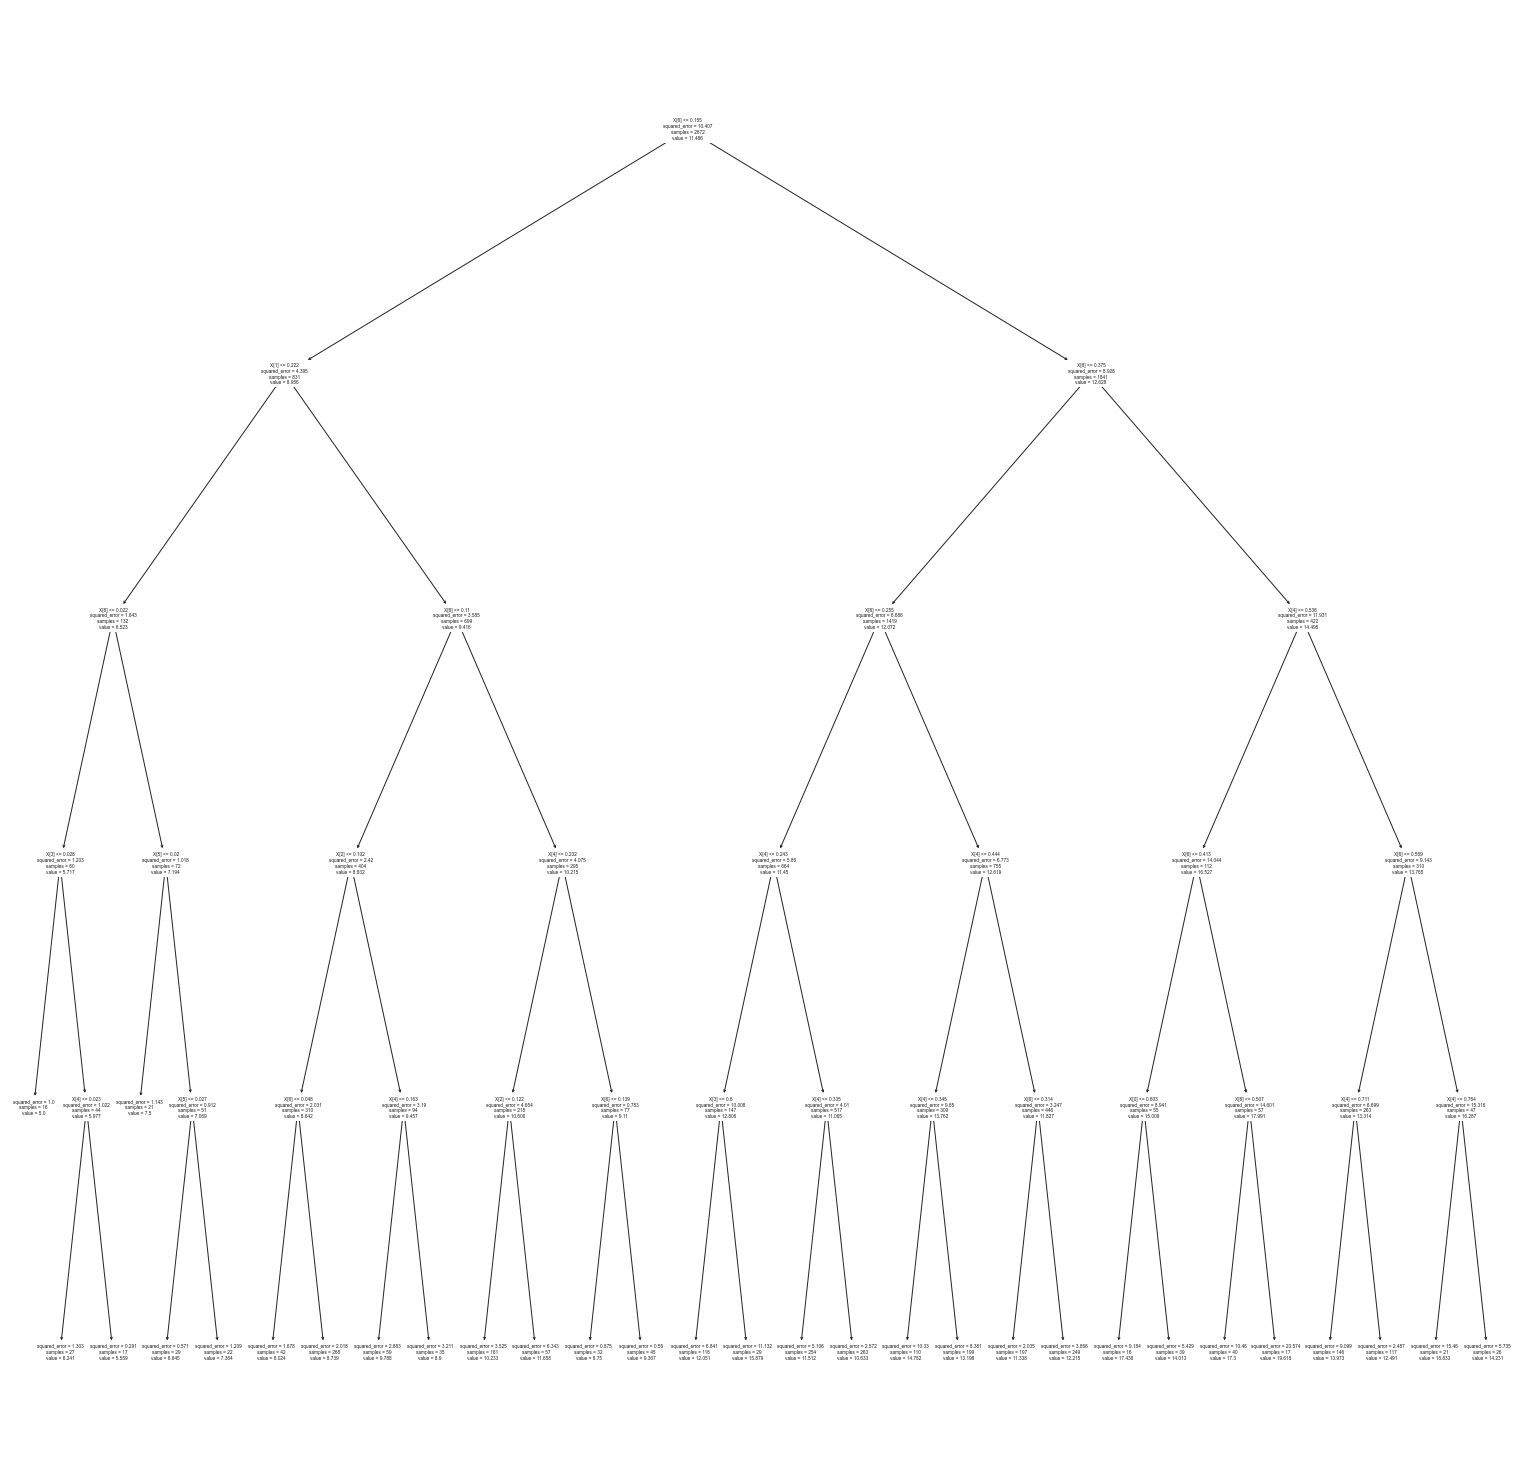

In [122]:
plt.figure(figsize=(27, 27))
tree.plot_tree(my_best_model)
plt.show()

**Лучшая модель по мнению GridSearchCV**

In [123]:
predictions_test = grid_search.predict(X_test) 
print('метрика на тестовой для модели GridSearchCV', mean_absolute_error(y_test, predictions_test))

метрика на тестовой для модели GridSearchCV 1.6106413702401872


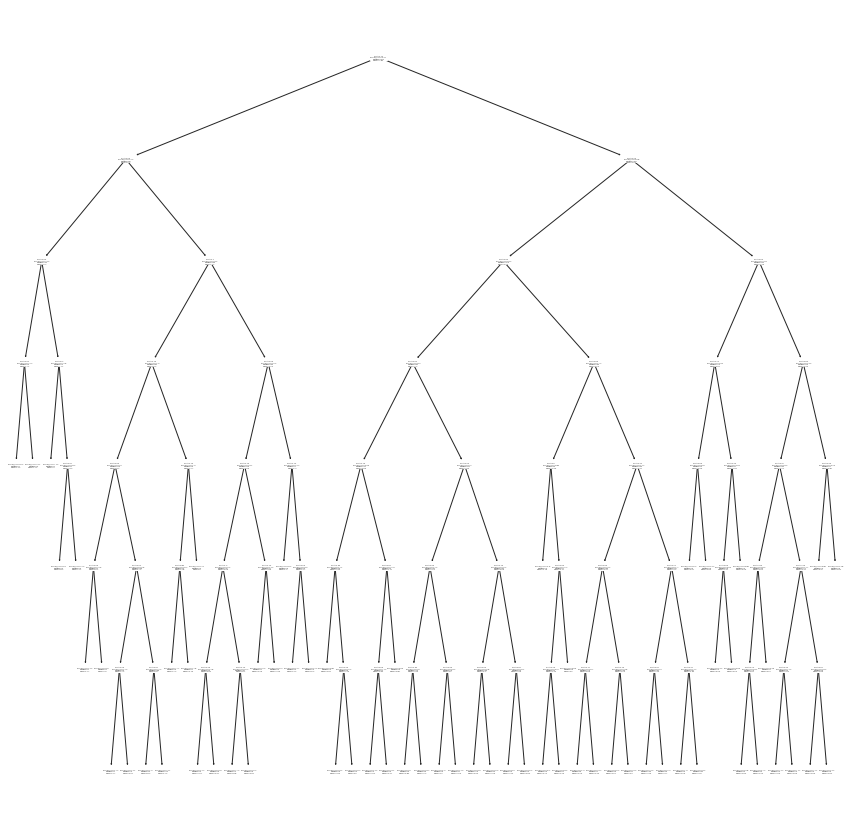

In [127]:
gridsearch = DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_leaf=19, min_samples_split=8, random_state=42)
gridsearch.fit(X_train, y_train)

plt.figure(figsize=(15, 15))
tree.plot_tree(gridsearch)
plt.show()

Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа,
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их на одном графике с помощью `seaborn.barplot` для обеих моделей.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

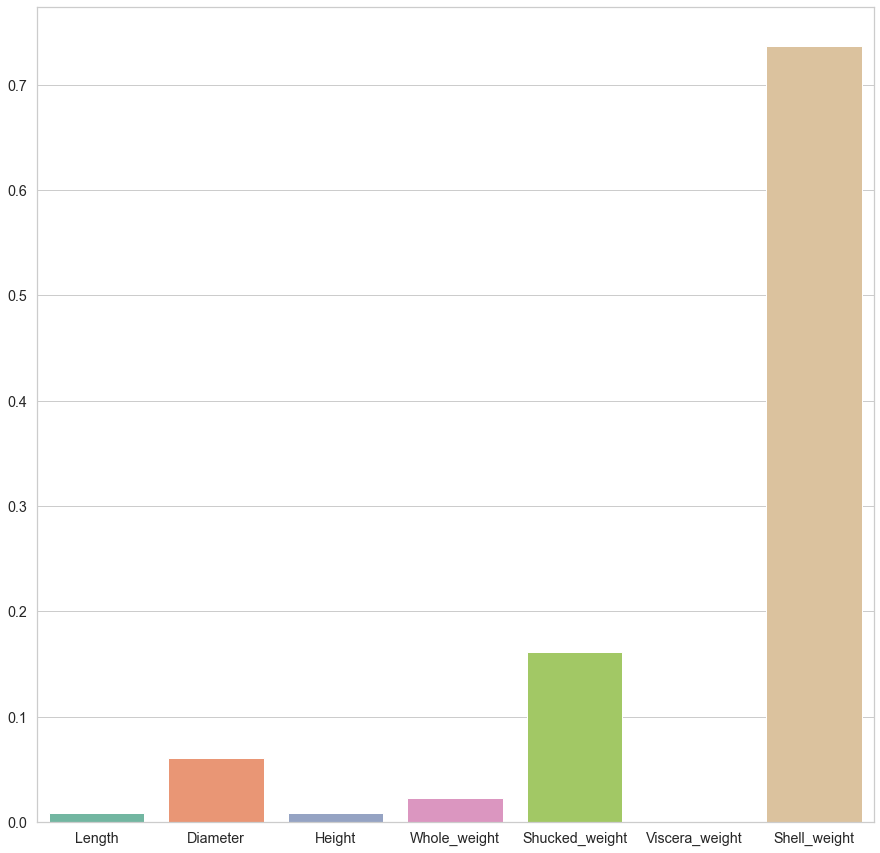

In [148]:
plt.figure(figsize=(15, 15))
columns = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight'] 
sns.barplot(columns, my_best_model.feature_importances_)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

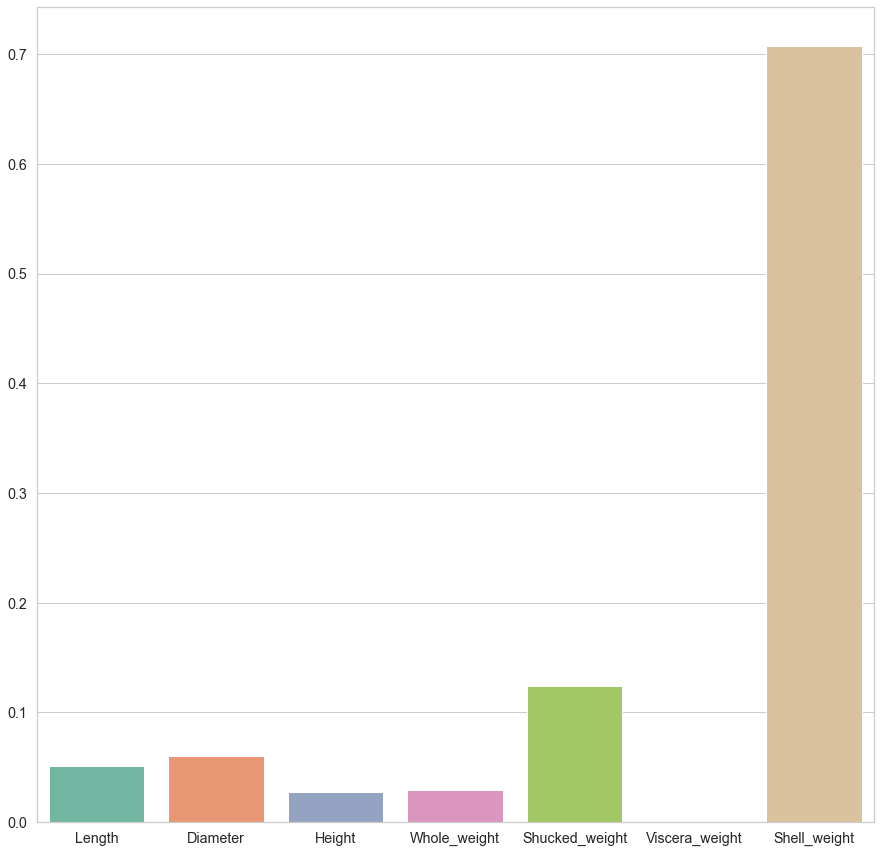

In [147]:
plt.figure(figsize=(15, 15))
sns.barplot(columns, gridsearch.feature_importances_)

Сделайте выводы. Объясните, согласуется ли логически, почему вес того или иного параметра так влияет на целевую переменную.

**Вывод:** все физические параметры размеров пропорциональны до какого-то момента возрасту (если у живого организма ограниченный рост), видимо, в особенности вес самой раковины имеет определяющее значение, возможно организм растит ее всю жизнь (или это параметр раковины который по истичении миллионов лет наименее изменяется), между двумя моделями тенденции весов особо не отличаются, в модели по мнению GridSearchCV чуть больший вес имеют отличные от преобладающего по важности признака.

## Задача 4

Для данных из задачи 3 обучите случайный лес на 500 деревьев.

In [154]:
n_estimators = 500
model = RandomForestRegressor(n_estimators=n_estimators)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

Посчитайте метрику на тестовой выборке.

In [ ]:
plt.figure(figsize=(10, 15))

accuracy_valid = []
accuracy_train = []
n_estimators_list = []

for i in range(1, n_estimators+1):
    n_estimators_list.append(i)
    model_part = model.estimators_[:i]
    predictions_train = sum(tree.predict(X_train) for tree in model_part) / len(model_part)
    predictions_valid = sum(tree.predict(X_valid) for tree in model_part) / len(model_part)
    accuracy_train.append(mean_absolute_error(predictions_train, y_train))
    accuracy_valid.append(mean_absolute_error(predictions_valid, y_valid))

plt.plot(n_estimators_list, accuracy_valid, label='valid')
plt.plot(n_estimators_list, accuracy_train, label='train')
plt.legend()
plt.title('зависимость ошибки модели в зависимости от количества деревьев')
plt.xlabel('количество деревьев'), plt.ylabel('accuracy')
plt.show()

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

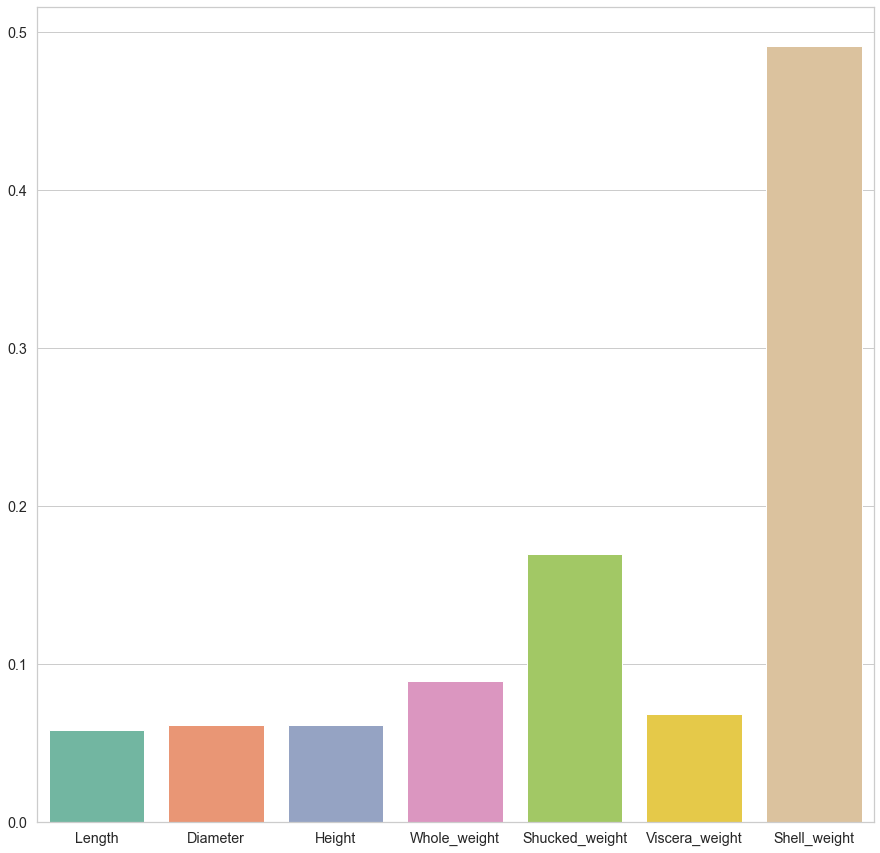

In [156]:
plt.figure(figsize=(15, 15))
sns.barplot(columns, model.feature_importances_)

Сделайте выводы.

**Вывод:** на графике зависимости ошибки модели в зависимости от количества деревьев оба графика в один момент резко выходят на ожидаемое плато, есть некоторое оптимальное значение количества деревьев в первых десятках, причем оно совпадает (или близко) для двух выборок, однако значения ошибок на трейне существенно меньше валидационных, что дают повод задуматься о переобучении модели; на диаграмме в целом похожее распределение как и в отдельном дереве, Shell_weight продолжает в разы весить больше остальных, далее тоже выделяется Shucked_weight, однако для отдельного дерева (random_state=42) параметр Viscera_weight вообще не имел веса, на общей картине он сравним с остальными, веса отдельных параметров выглядят более гармонично.